# *Escuela Politécnica Nacional*
### Proyecto N° 1
### Integrantes
#### Carlos Vasquez 
#### Gustavo Aconda
***

### Descripcion Del DataSet
#### El dataset muestra alrededor de mil registros acerca de las caracteristicas que una persona tiene en el ámbito laboral.
***

### Objetivos
+ Identificar las principales características, tendencias y estadísticas del conjunto de datos seleccionado.
+ Crear modelos de regresión lineal y polinomial que predigan el total de ingresos de una persona en base a sus características laborales, usando las tecnicas vistas en clase para mejorar el modelo y su evaluación.
+ Evaluar los modelos y determinar cuál de ellos tienen mejores métricas y por ende, mejor predicen la etiqueta de salida. 
***

#### Características, tendencias y estadísticas del dataset.

In [2]:
#Se importan las librerias necesarias para trabajar con dataframes y vectores.
import pandas as pd
import numpy as np

In [4]:
#Se lee el dataset y se lo guarda como dataframe
df=pd.read_csv("Datasetproyecto.csv")
df=df.drop([0],axis=0);

In [5]:
#Se muestran los 5 primeros valores para identificar las variables
df.head()

,Puesto Institucional,Grado jerarquico o escala al que pertenece el puesto,Remuneracion mensual unificada,Remuneracion unificada (anual),Decimo Tercera Remuneracion,Decima Cuarta Remuneracion,Horas suplementarias y extraordinarias,Encargos y subrogaciones,Total ingresos adicionales
1,SUPERINTENDENTE DE MANTENIMIENTO,6,5250.0,63000.0,437.50,31.25,0.0,0.0,468.75
2,SUPERVISOR RCRS,5,3300.0,39600.0,275.00,31.25,0.0,0.0,306.25
3,MENSAJERO,1,962.0,11544.0,80.17,31.25,0.0,0.0,111.42
4,AUXILIAR DE CAFETERIA,1,779.0,9348.0,64.92,31.25,0.0,0.0,96.17
5,AUXILIAR DE CAFETERIA,1,784.0,9408.0,65.33,31.25,0.0,0.0,96.58


In [6]:
#Se muestra el numero de registros y variables
df.shape

(10278, 9)

In [7]:
#Se crea la cabecera del dataframe
df.columns=["PuestoInstitucional","Gradojerarquicooescalaalqueperteneceelpuesto","Remuneracionmensualunificada","Remuneracionunificadaanual","DecimoTerceraRemuneracion","DecimaCuartaRemuneracion","Horassuplementariasyextraordinarias","Encargosysubrogaciones","Totalingresosadicionales"]

In [8]:
df.head()

,PuestoInstitucional,Gradojerarquicooescalaalqueperteneceelpuesto,Remuneracionmensualunificada,Remuneracionunificadaanual,DecimoTerceraRemuneracion,DecimaCuartaRemuneracion,Horassuplementariasyextraordinarias,Encargosysubrogaciones,Totalingresosadicionales
1,SUPERINTENDENTE DE MANTENIMIENTO,6,5250.0,63000.0,437.50,31.25,0.0,0.0,468.75
2,SUPERVISOR RCRS,5,3300.0,39600.0,275.00,31.25,0.0,0.0,306.25
3,MENSAJERO,1,962.0,11544.0,80.17,31.25,0.0,0.0,111.42
4,AUXILIAR DE CAFETERIA,1,779.0,9348.0,64.92,31.25,0.0,0.0,96.17
5,AUXILIAR DE CAFETERIA,1,784.0,9408.0,65.33,31.25,0.0,0.0,96.58


In [9]:
#Se muestra el tipo de dato de las variables
df.dtypes

PuestoInstitucional                              object
Gradojerarquicooescalaalqueperteneceelpuesto      int64
Remuneracionmensualunificada                    float64
Remuneracionunificadaanual                      float64
DecimoTerceraRemuneracion                       float64
DecimaCuartaRemuneracion                        float64
Horassuplementariasyextraordinarias             float64
Encargosysubrogaciones                          float64
Totalingresosadicionales                        float64
dtype: object

In [10]:
#Se cambia el tipo de dato a numerico
df["Gradojerarquicooescalaalqueperteneceelpuesto"]=df["Gradojerarquicooescalaalqueperteneceelpuesto"].apply(pd.to_numeric)

In [11]:
#Se cambia todos los datos numericos a float
df["Remuneracionmensualunificada"]=df["Remuneracionmensualunificada"].astype(float)
df["Remuneracionunificadaanual"]=df["Remuneracionunificadaanual"].astype(float)
df["DecimoTerceraRemuneracion"]=df["DecimoTerceraRemuneracion"].astype(float)
df["DecimaCuartaRemuneracion"]=df["DecimaCuartaRemuneracion"].astype(float)
df["Horassuplementariasyextraordinarias"]=df["Horassuplementariasyextraordinarias"].astype(float)
df["Encargosysubrogaciones"]=df["Encargosysubrogaciones"].astype(float)
df["Totalingresosadicionales"]=df["Totalingresosadicionales"].astype(float)

In [12]:
#Se muestran los 20 primeros registros
df.head(20)

,PuestoInstitucional,Gradojerarquicooescalaalqueperteneceelpuesto,Remuneracionmensualunificada,Remuneracionunificadaanual,DecimoTerceraRemuneracion,DecimaCuartaRemuneracion,Horassuplementariasyextraordinarias,Encargosysubrogaciones,Totalingresosadicionales
1,SUPERINTENDENTE DE MANTENIMIENTO,6,5250.00,63000.0,437.50,31.25,0.00,0.0,468.75
2,SUPERVISOR RCRS,5,3300.00,39600.0,275.00,31.25,0.00,0.0,306.25
3,MENSAJERO,1,962.00,11544.0,80.17,31.25,0.00,0.0,111.42
4,AUXILIAR DE CAFETERIA,1,779.00,9348.0,64.92,31.25,0.00,0.0,96.17
5,AUXILIAR DE CAFETERIA,1,784.00,9408.0,65.33,31.25,0.00,0.0,96.58
6,MENSAJERO,1,784.00,9408.0,65.33,31.25,0.00,0.0,96.58
7,JEFE DE CONTROL DE QUIMICOS,6,6146.00,73752.0,512.17,31.25,0.00,0.0,543.42
8,ASISTENTE ADMINISTRATIVA,2,1100.00,13200.0,91.67,31.25,0.00,0.0,122.92
9,ASISTENTE DE ARCHIVO,2,1131.00,13572.0,94.25,31.25,0.00,0.0,125.50
10,ASISTENTE DE ARCHIVO,2,1284.00,15408.0,107.00,31.25,0.00,0.0,138.25


In [13]:
#Se muestra la informacion estadística
df.describe()

,Gradojerarquicooescalaalqueperteneceelpuesto,Remuneracionmensualunificada,Remuneracionunificadaanual,DecimoTerceraRemuneracion,DecimaCuartaRemuneracion,Horassuplementariasyextraordinarias,Encargosysubrogaciones,Totalingresosadicionales
count,10278.000000,10278.000000,10278.000000,10278.000000,10278.000000,10278.000000,10278.000000,10278.000000
mean,2.781280,1402.857275,16834.287297,120.844457,31.239155,46.759352,89.474171,288.317136
std,1.596566,1072.107958,12865.295495,91.988766,0.346946,149.558952,282.039880,337.453392
min,1.000000,465.000000,5580.000000,37.460000,15.620000,0.000000,-641.420000,-473.360000
25%,1.000000,574.000000,6888.000000,48.420000,31.250000,0.000000,0.000000,97.580000
50%,3.000000,1087.000000,13044.000000,91.370000,31.250000,0.000000,0.000000,197.830000
75%,4.000000,1886.150000,22633.800000,164.375000,31.250000,20.290000,0.000000,311.900000
max,8.000000,8437.500000,101250.000000,703.120000,31.250000,2844.980000,5284.000000,5391.580000


In [14]:
#Se muestra las variables con su coeficiente de correlación con las demas variables
df.corr()

,Gradojerarquicooescalaalqueperteneceelpuesto,Remuneracionmensualunificada,Remuneracionunificadaanual,DecimoTerceraRemuneracion,DecimaCuartaRemuneracion,Horassuplementariasyextraordinarias,Encargosysubrogaciones,Totalingresosadicionales
Gradojerarquicooescalaalqueperteneceelpuesto,1.000000,0.794999,0.794999,0.792869,-0.014162,0.144326,0.337541,0.562197
Remuneracionmensualunificada,0.794999,1.000000,1.000000,0.989889,-0.009767,0.126538,0.002480,0.327985
Remuneracionunificadaanual,0.794999,1.000000,1.000000,0.989889,-0.009767,0.126538,0.002480,0.327985
DecimoTerceraRemuneracion,0.792869,0.989889,0.989889,1.000000,0.009501,0.258905,-0.003309,0.384587
DecimaCuartaRemuneracion,-0.014162,-0.009767,-0.009767,0.009501,1.000000,0.009773,0.009917,0.016238
Horassuplementariasyextraordinarias,0.144326,0.126538,0.126538,0.258905,0.009773,1.000000,-0.040982,0.479533
Encargosysubrogaciones,0.337541,0.002480,0.002480,-0.003309,0.009917,-0.040982,1.000000,0.816734
Totalingresosadicionales,0.562197,0.327985,0.327985,0.384587,0.016238,0.479533,0.816734,1.000000


#### Modelo de regresion lineal multivariable y una variable
***


In [15]:
# Importamaos las bibliotecas necesarias para poder utilizar la biblioteca de  regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
# Definimos las variables con el mas bajo valor de correlación para poder apreciar cual es el comportamiento del dataset con
# estos valores y lo compararemos si utilizamos un solo valor con un alto valor de corelación
x=np.asarray(df[["Totalingresosadicionales","Gradojerarquicooescalaalqueperteneceelpuesto","Horassuplementariasyextraordinarias"]])
y=np.asarray(df["Remuneracionunificadaanual"])

In [17]:
#Definimos los conjuntos de entrenamiento y prueba
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=101)

In [18]:
# Imprimimos el número de elementos del conjunto de entrenamiento y prueba
print("Conjunto Entrenamiento :", xtrain.shape,ytrain.shape)
print("conjunto Prueba: ",xtest.shape,ytest.shape)

Conjunto Entrenamiento : (7194, 3) (7194,)
conjunto Prueba:  (3084, 3) (3084,)


In [20]:
# Almacenamos en una variable el metodo para regresión lineal 
lm=LinearRegression()

In [21]:
# Entrenamos el modelo con el conjunto de entrenamiento
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# Definimos la hipotesis 
h=lm.predict(xtest)

In [23]:
# Importamos las bibliotecas para el error medio cuadratico
from sklearn.metrics import mean_squared_error

In [24]:
# utilizamos la biblioteca para calcular el error medio en función de la hipotesisi y el conjunto de prueba
mse2 = mean_squared_error(ytest,h)
print("el error cuadratico medio del precio y  hipotesis es :",mse2)

el error cuadratico medio del precio y  hipotesis es : 56049711.51647666


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

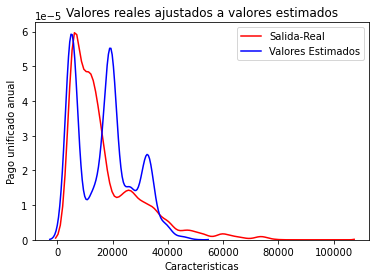

In [33]:
grafica=sns.distplot(ytrain,hist=False, color="r",label="Salida-Real")#precio real
sns.distplot(h,hist=False,color="b",label="Valores Estimados",ax=grafica)#hipotesis ax para que esten sobrelapadas

## si colocamos tRUE dibujamos barras 

#Detalles de etiquetado
plt.title("Valores reales ajustados a valores estimados")
plt.xlabel("Pago unificado anual")
plt.ylabel("Cantidad de personas")
plt.show()

In [27]:
## Valor mas alto se utilizo la caracteristica con el valor de corelación mas alto debido a un erro se debio utilizar 
# la variable del valor mas bajo de corelación
xa=np.asarray(df[["DecimoTerceraRemuneracion","DecimaCuartaRemuneracion"]])
ya=np.asarray(df["Remuneracionunificadaanual"])

In [28]:
# dividimos el conjunto de datos en entrenamiento y prueba
xtraina,xtesta,ytraina,ytesta=train_test_split(xa,ya,train_size=0.70,test_size=0.30,random_state=101)

In [29]:
# definimos en una variable el modelo de regresión lineal
lma=LinearRegression()
#entrenamos el modelo en base a las caracteristicas seleccionadas
lma.fit(xa,ya)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Calculamos los valores de la hipotesis
ha=lma.predict(xtesta)

In [31]:
# Calculamos el error medio cuadratico
msea = mean_squared_error(ytesta,ha)
print("el error cuadratico medio del precio y  hipotesis es :",msea)

el error cuadratico medio del precio y  hipotesis es : 2846327.180020168


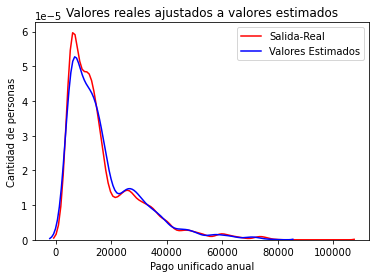

In [34]:
grafica=sns.distplot(ytraina,hist=False, color="r",label="Salida-Real")#precio real
sns.distplot(ha,hist=False,color="b",label="Valores Estimados",ax=grafica)#hipotesis ax para que esten sobrelapadas

## si colocamos tRUE dibujamos barras 

#Detalles de etiquetado
plt.title("Valores reales ajustados a valores estimados")
plt.xlabel("Pago unificado anual")
plt.ylabel("Cantidad de personas")
plt.show()

***

#### Modelo de regresion polinomial, aumento de caracteristicas


In [34]:
#Se miran las correlaciones para seleccionar variables de entrada
df.corr()

,Gradojerarquicooescalaalqueperteneceelpuesto,Remuneracionmensualunificada,Remuneracionunificadaanual,DecimoTerceraRemuneracion,DecimaCuartaRemuneracion,Horassuplementariasyextraordinarias,Encargosysubrogaciones,Totalingresosadicionales
Gradojerarquicooescalaalqueperteneceelpuesto,1.000000,0.794999,0.794999,0.792869,-0.014162,0.144326,0.337541,0.562197
Remuneracionmensualunificada,0.794999,1.000000,1.000000,0.989889,-0.009767,0.126538,0.002480,0.327985
Remuneracionunificadaanual,0.794999,1.000000,1.000000,0.989889,-0.009767,0.126538,0.002480,0.327985
DecimoTerceraRemuneracion,0.792869,0.989889,0.989889,1.000000,0.009501,0.258905,-0.003309,0.384587
DecimaCuartaRemuneracion,-0.014162,-0.009767,-0.009767,0.009501,1.000000,0.009773,0.009917,0.016238
Horassuplementariasyextraordinarias,0.144326,0.126538,0.126538,0.258905,0.009773,1.000000,-0.040982,0.479533
Encargosysubrogaciones,0.337541,0.002480,0.002480,-0.003309,0.009917,-0.040982,1.000000,0.816734
Totalingresosadicionales,0.562197,0.327985,0.327985,0.384587,0.016238,0.479533,0.816734,1.000000


In [ ]:
#Se hace la grafica de dispersion y residual de las 3 variables mas relacionadas a la etiqueta para ver si se puede realizar un sobreajuste si la tendencia de los puntos tiende a no ser lineal


<AxesSubplot:xlabel='Encargosysubrogaciones', ylabel='Totalingresosadicionales'>

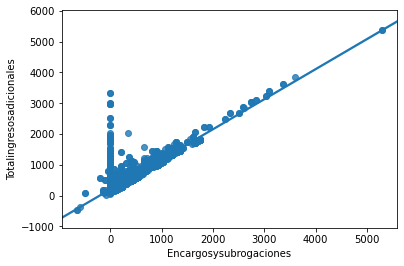

In [76]:
#grafica dispersion Encargosysubrogaciones,Totalingresosadicionales
sns.regplot(x="Encargosysubrogaciones",y="Totalingresosadicionales",data=df)

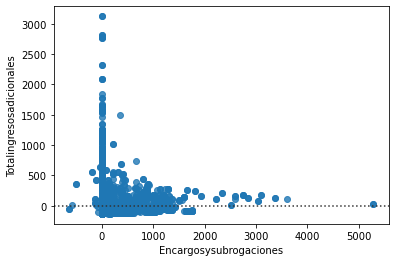

In [85]:
#grafica residual Encargosysubrogaciones,Totalingresosadicionales
import seaborn as sns
sns.residplot(df["Encargosysubrogaciones"],df["Totalingresosadicionales"])
plt.show()

<AxesSubplot:xlabel='Gradojerarquicooescalaalqueperteneceelpuesto', ylabel='Totalingresosadicionales'>

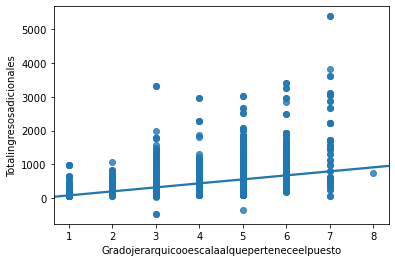

In [78]:
#grafica dispersion Gradojerarquicooescalaalqueperteneceelpuesto,Totalingresosadicionales
sns.regplot(x="Gradojerarquicooescalaalqueperteneceelpuesto",y="Totalingresosadicionales",data=df)

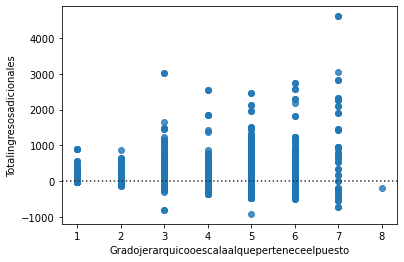

In [83]:
#grafica residual Gradojerarquicooescalaalqueperteneceelpuesto,Totalingresosadicionales
sns.residplot(df["Gradojerarquicooescalaalqueperteneceelpuesto"],df["Totalingresosadicionales"])
plt.show()

<AxesSubplot:xlabel='Horassuplementariasyextraordinarias', ylabel='Totalingresosadicionales'>

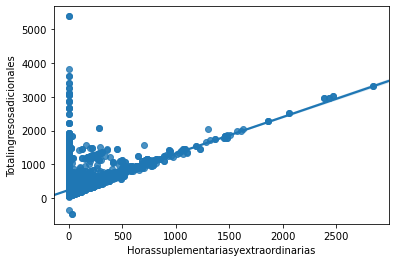

In [80]:
#grafica dispersion Horassuplementariasyextraordinarias,Totalingresosadicionales
sns.regplot(x="Horassuplementariasyextraordinarias",y="Totalingresosadicionales",data=df)

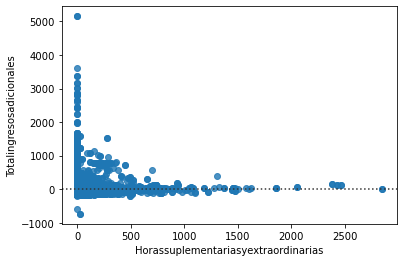

In [82]:
#grafica residual Horassuplementariasyextraordinarias,Totalingresosadicionales
sns.residplot(df["Horassuplementariasyextraordinarias"],df["Totalingresosadicionales"])
plt.show()

In [ ]:
#Para el modelo de regresion polinomial se hara uso de las 3 variables de las graficas ya que presentan buenas graficas de dispersión y residual. Ademas se
#hara uso de aumento de caracteristicas con la funcion polinomial, esto con el fin de mejorar el modelo.
#Por otro lado se utilizara validación cruzada para evaluar el rendimiento del modelo.
#Tambien se utilizara regularizacion Ridge para disminuir los valores de theta y mejorar el modelo


In [44]:
#Se normalizan la variables del dataset
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()
v_n=df[["Encargosysubrogaciones","Gradojerarquicooescalaalqueperteneceelpuesto","Horassuplementariasyextraordinarias"]]

In [45]:
SCALE.fit(v_n)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
#Se obtienen los nuevos valores normalizados
x_normalizado=SCALE.transform(v_n)
y_normalizado=(df["Totalingresosadicionales"])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [47]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_normalizado,y_normalizado,train_size=0.70,test_size=0.30,random_state=101)
print("Numero de muestras de Prueba= ",xtest.shape[0])
print("Numero de muestras de Entrenamiento= ",xtrain.shape[0])

Numero de muestras de Prueba=  3084
Numero de muestras de Entrenamiento=  7194


In [48]:
#Dimensiones de xtest
xtest.shape

(3084, 3)

In [49]:
#Dimensiones de ytest
ytest.shape

(3084,)

In [51]:
#se crea el modelo de regresion lineal empleando funcion polinomial de grado 3
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
xtrain_pr=pr.fit_transform(xtrain)
xtest_pr=pr.fit_transform(xtest)

In [52]:
#Dimensiones o numero de variables de entrada
print("Dimensiones de entrenamiento",xtrain_pr.shape)
print("Dimensiones de prueba",xtest_pr.shape)

Dimensiones de entrenamiento (7194, 20)
Dimensiones de prueba (3084, 20)


In [54]:
#Entrenar el algoritmo y definir la hipotesis
from sklearn.linear_model import LinearRegression
poly=LinearRegression().fit(xtrain_pr,ytrain)
poly.fit(xtrain_pr,ytrain)
h=poly.predict(xtest_pr)

In [55]:
#Evaluar el modelo con MSE
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,h)
print("El error cuadratico medio es: ",mse)

El error cuadratico medio es:  1321.4284332512125


In [56]:
#Evaluar el modelo con R^2
r2=r2_score(ytest,h)
print("El factor R^2 es: ",r2)

El factor R^2 es:  0.9873631174848144


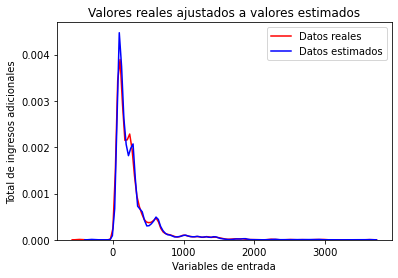

In [70]:
#Se hace la grafica de distribucion para ver si el modelo predecirá bien
import seaborn as sns
#Graficar la salida para la regresion lineal para engine-size
grafica=sns.distplot(ytest,hist=False,color="r",label="Datos reales")#False para que no se vean las lineas
sns.distplot(h,hist=False,color="b",label="Datos estimados",ax=grafica)#ax para ver si estan sobrelapadas con la grafica

#detalles de etiquetado
plt.title("Valores reales ajustados a valores estimados")
plt.xlabel("Variables de entrada")
plt.ylabel("Total de ingresos adicionales")
plt.show()

In [ ]:
#Como se puede ver en la grafica de distribucion, el modelo predice bien con respecto a los datos reales.

In [68]:
#Se aplica regularizacion para dismu¿inuir los parametros theta con el fin de disminuir el error o aumentar R^2
from sklearn.linear_model import Ridge
#Crear un lazo para evaluar el valor de R2_score
R2_val=[]
FACTOR_LAMBDA=[0.01,0.1,0.5,0.8,1,3,5,10,40]
for factor in FACTOR_LAMBDA:
    RidgeR1=Ridge(alpha=factor)
    RidgeR1.fit(xtrain_pr,ytrain)
    hR1=RidgeR1.predict(xtest_pr)
    R2_val.append(r2_score(ytest,hR1))

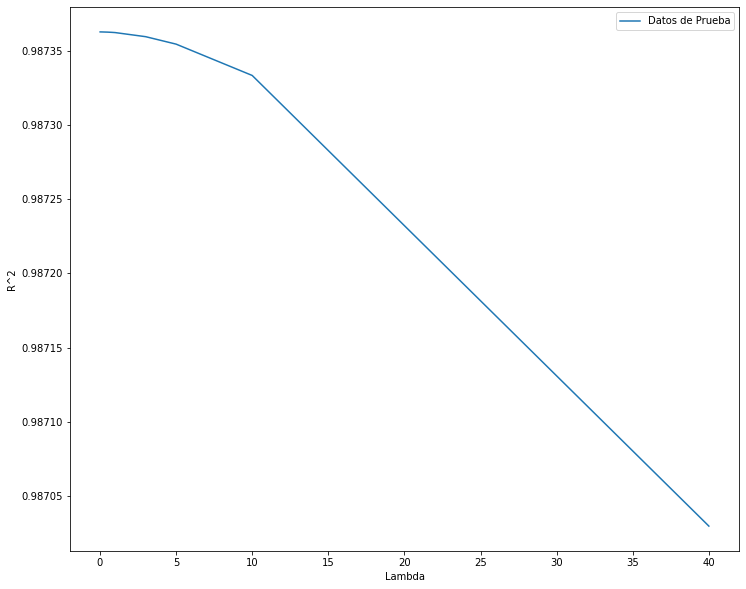

In [69]:
#se grafica el factor labda para que el factor R^2 aumente
import matplotlib.pyplot as plt
width=12
height=10
plt.figure(figsize=(width,height))
plt.plot(FACTOR_LAMBDA,R2_val,label="Datos de Prueba")
plt.xlabel("Lambda")
plt.ylabel("R^2")
plt.legend()

In [ ]:
#Mediante la gafica se puede observar que mientras mas aumenta el valor de labda mas disminuye el rendimiento, es decir que no hace falta aplicar regularización.

##### Validacion cruzada

In [73]:
from sklearn.model_selection import cross_val_score,cross_val_predict
Lr=LinearRegression()
#VC es una matriz que contiene los valores de evaluacion de cada iiteracion
VC=cross_val_score(Lr,xtrain,ytrain,cv=8)#se divide en 4 segmentos y hace 4 iteraciones

In [74]:
#Se imprime los valores calculados en cada iteracion
VC

array([0.97164744, 0.98117402, 0.98494903, 0.98040755, 0.97920627,
       0.9794348 , 0.9801217 , 0.97983   ])

In [75]:
#Se imprime el promedio
print("El promedio del rendimiento de las iteraciones es: ",VC.mean())

El promedio del rendimiento de las iteraciones es:  0.979596351668256


In [ ]:
#Mediante la validacion cruzada se tuvo un mayor rendimiento que cuando se utilizó el conjunto de entrenamiento y prueba para validar,
#Esto quiere decir que el porcentaje de rendimiento mostrado es mas confiable que con el conjunto train y test